# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#import the libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#load the test and train data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


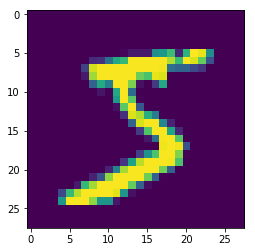

In [5]:
#training data shape
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
#visualize first example
plt.imshow(X_train[0])

In [0]:
#reshape the training and test data
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#convert to 'float32' and divide by 255 to scale it in [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
#print the 1st 10 training examples
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
#one hot encoded data
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
#model 
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))# RF=3
model.add(Dropout(.2))
model.add(Convolution2D(32, 3,3, activation='relu'))#RF =5
model.add(MaxPooling2D((2,2)))#RF=10
model.add(Dropout(.2))
model.add(Convolution2D(10, 1, activation='relu'))#RF=10
model.add(Dropout(.2))
model.add(Convolution2D(10, 12))
model.add(Flatten())
model.add(Activation('softmax'))

W0822 09:54:00.169339 139670478296960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0822 09:54:00.187146 139670478296960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 09:54:00.189862 139670478296960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 09:54:00.205700 139670478296960 deprecation_wrapper.py:119] From /usr/local/lib/py

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        330       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 10)        0         
__________

In [13]:
#compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0822 09:54:01.713146 139670478296960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 09:54:01.742217 139670478296960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
#fit the model
history=model.fit(X_train, Y_train, batch_size=1024, nb_epoch=300, verbose=1,validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0822 09:54:03.858180 139670478296960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/300
54000/54000 [==============================] - 5s 89us/step - loss: 1.1607 - acc: 0.6605 - val_loss: 0.3063 - val_acc: 0.9095
Epoch 2/300
54000/54000 [==============================] - 2s 30us/step - loss: 0.3805 - acc: 0.8843 - val_loss: 0.2186 - val_acc: 0.9393
Epoch 3/300
54000/54000 [==============================] - 2s 30us/step - loss: 0.2848 - acc: 0.9142 - val_loss: 0.1605 - val_acc: 0.9553
Epoch 4/300
54000/54000 [==============================] - 2s 31us/step - loss: 0.2165 - acc: 0.9342 - val_loss: 0.1247 - val_acc: 0.9677
Epoch 5/300
54000/54000 [==============================] - 2s 31us/step - loss: 0.1808 - acc: 0.9461 - val_loss: 0.1075 - val_acc: 0.9732
Epoch 6/300
54000/54000 [==============================] - 2s 31us/step - loss: 0.1503 - acc: 0.9547 - val_loss: 0.0927 - val_acc: 0.9745
Epoch 7/300
54000/54000 [==============================] - 2s 31us/step - loss: 0.1338 - acc: 0.9591 - val_loss: 0.0816 - v

In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


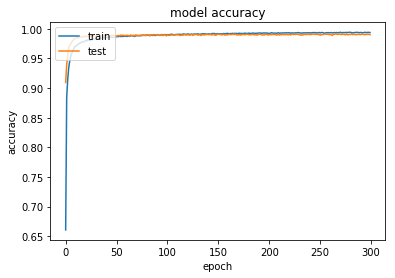

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

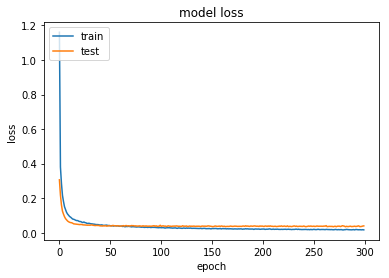

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
#print the ['loss', 'acc']
print(score)

[0.03189528723485564, 0.9907]


In [0]:
#predict on test data
y_pred = model.predict(X_test)

In [21]:
#print predicted and actual labels
print(y_pred[:9])
print(y_test[:9])

[[4.69756077e-19 5.11980798e-14 1.57531366e-09 1.18426726e-06
  9.86031467e-18 4.65117907e-13 1.73008136e-27 9.99998808e-01
  1.50553669e-12 1.33852052e-09]
 [4.11585571e-10 2.13708816e-07 9.99999762e-01 2.62921981e-13
  6.64579933e-16 1.45450661e-17 6.30238439e-09 6.65133130e-15
  5.56597303e-13 1.25124190e-14]
 [1.59598376e-10 9.99996662e-01 2.44615791e-07 1.99357131e-09
  2.07558901e-06 2.76466561e-09 1.01323634e-08 4.18433814e-07
  5.63661160e-07 6.14403861e-10]
 [9.99999166e-01 2.68974294e-19 5.28430348e-07 1.19553401e-09
  8.78051484e-13 2.11477988e-10 2.74690166e-07 1.63323348e-11
  6.00007368e-08 3.74826001e-08]
 [3.15919235e-10 6.48861701e-16 5.14917275e-10 1.63196483e-13
  9.99997616e-01 2.90792843e-16 2.89804530e-12 5.56988011e-09
  5.03718844e-10 2.35975313e-06]
 [6.40479503e-10 9.99893427e-01 1.17185891e-06 6.79504619e-10
  3.93960136e-06 9.72598876e-11 1.63764435e-09 9.65740110e-05
  4.81672805e-06 3.73664300e-08]
 [2.52323339e-18 1.18307760e-15 1.31066125e-09 1.36584283e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [23]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7f07435137b8>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7f0746629ac8>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7f0743de7a58>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7f074357a4e0>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7f074355c9e8>,
 'dropout_1': <keras.layers.core.Dropout at 0x7f0746629668>,
 'dropout_2': <keras.layers.core.Dropout at 0x7f074357ae48>,
 'dropout_3': <keras.layers.core.Dropout at 0x7f0743de7978>,
 'flatten_1': <keras.layers.core.Flatten at 0x7f074355c3c8>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7f0743de7a90>}

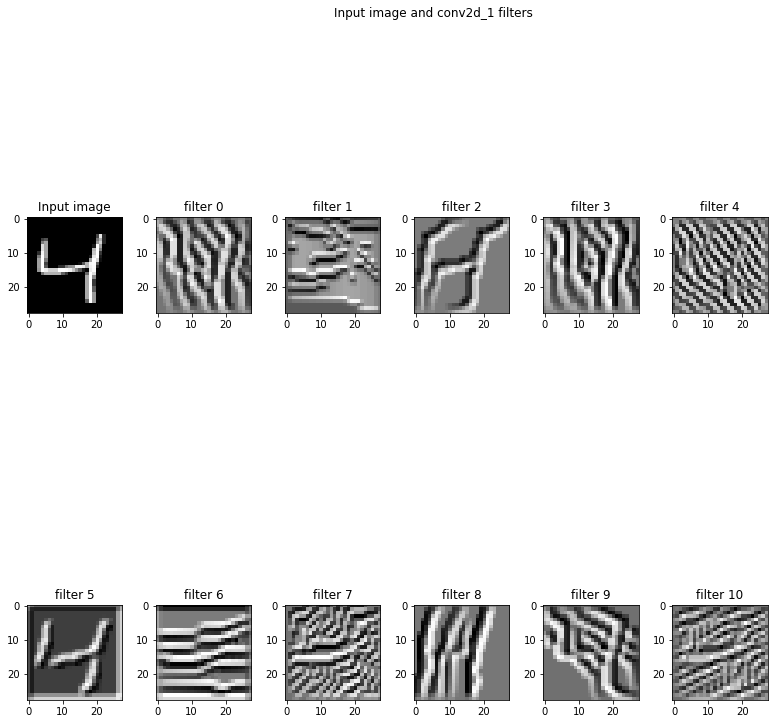

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()